<a href="https://colab.research.google.com/github/pratikgujral/Machine-Learning-Scientist-With-Python/blob/master/Cluster_Analysis_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
- Part-0: Introduction
- Part 1: Introduction to Clustering
- Part 2: Hierarchical CLustering
- Part 3: K-Means Clustering
- Part 4: Clustering in Real World

# Part-0: Introduction
You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? In this tutorial, we will look at unsupervised learning through clustering using the SciPy library in Python. This tutorial covers pre-processing of data and application of hierarchical and k-means clustering. Through the tutorial, we will explore player statistics from a popular football video game, FIFA 18.

In [1]:
# To display IFrame videos
from IPython.display import IFrame

# Part-1: Introduction to Clustering
[SLIDES](https://projector-video-pdf-converter.datacamp.com/14739/chapter1.pdf)

In [2]:
IFrame('https://projector.datacamp.com/?auto_play=play&amp;projector_key=course_14739_2f928768c0006f538ec5eaa9188fa981', width=800, height=400)

## Clustering
- The process of grouping items with similar characteristics 
- Grouping is done in such a way that items in one group are close to one another on some characteristic(s), as compared to any item in another group.
- Unsupervised learning


## Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. We have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively

In [3]:
# Given data
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

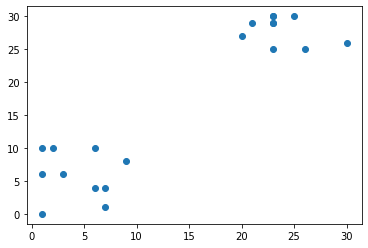

In [4]:
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of clsuter analysis

In [5]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_c77f9ecb23a73deb1c441f99c40bed48', width=800, height=400)

### Clustering algorithms
There are many clustering algorithms available
- Hierarchical clustering
- K Means clustering
- DBSCAN
- Gaussian methods etc.

### Way of clustering
- Initially every individual poitn is considered as a cluster
- **Cluster center** is the mean of attributes of all data points in a given cluster
- Then, distance between all pairs of cluster centers are computed, and the two cluster centers that are closest to one another are combined together to form a larger cluster. This is repeated until we are left with desired no. of clusters.

### Hierarchical Clustering with Scipy
- We use **`linkage`**, **`fcluster`** methods from **`scipy.cluster.hierarchy`**
- **`linkage()`** computes distances between intermediate clusters
- **`fcluster()`** generates clusters and assignes associate cluster labels to a new column in the DataFrame

## K Means clustering
- First it generates cluster centers at random locations. Number of cluster center points to be generated are provided by the user
- Distance to these cluster centers is computer for each point, and the point is assigned to its closest cluster.
- The cluster centers are recomputed.
- This process is repeated a pre-defined number of times.

### K Means Clustering with Scipy
- We use **`kmeans`** and **`vq`** from **`scipy.kmeans.vq`**.
- **`kmeans()`:** Used to compute centroids of the cluster
- **`vq`**: USed to assign a point to a cluster

## Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, we identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, we will form two clusters of the sightings using hierarchical clustering.
'x' and 'y' are columns of X and Y coordinates of the locations of sightings.

In [6]:
# Given information
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


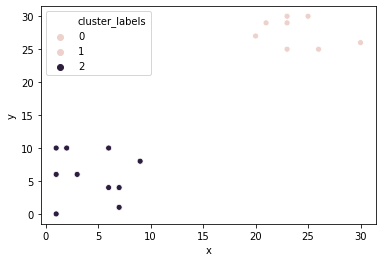

In [7]:
# Creating a Pandas Dataframe with x and y as two columns
import pandas as pd
df = pd.DataFrame(data=zip(x,y), columns=['x','y'])

# Importing libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster

# Using the linkage() function to compute distance
Z = linkage(df, method='ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, t=2, criterion='maxclust')
# t=3 denotes we need max of 2 clusters only.

# Plotting the coordinates colored by their cluster labels
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels')
plt.show()

Notice that the cluster labels are plotted with different colors. The resulting plot has an extra cluster labelled 0 in the legend. This will be explained later.

## Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [8]:
# Given information
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

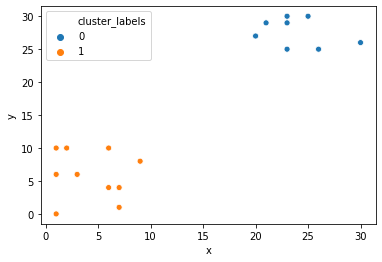

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq, kmeans

df = pd.DataFrame(zip(x,y), columns=['x', 'y'], dtype=float)

# Computing cluster centers
centroids, _ = kmeans(df, 2)

# Assigning cluster labels to all data points
df['cluster_labels'], _ = vq(df, centroids)

# Plotting the data points colored by cluster labels
sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels')
plt.show()

Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

---

## Data Preparation for Cluster Analysis
### Why do we need to prepare data for cluster analysis
- We may have variables that have incomparable units (Eg. Product dimensions in cm, price in $)
- Variables with same units, but have vastly different scales and/or variances (Eg. expenditure on cereals and expenditure on travel)
- Data in raw form may lead to introduction of bias in clustering, with heavy dependence on one variable.
- **SOLUTION:** Normalize the individual variables

## Normalization of data
- Rescale data to standard deviation of 1
> **`x_new = x/std_ev(x)`**


In [10]:
IFrame("https://projector.datacamp.com/?auto_play=play&amp;projector_key=course_14739_2e0dd1f4c55f2da39c4276b1b0395184", width=800, height=400)

## Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. `goals_for` is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the **`whiten()`** function from **`scipy.cluster.vq`**.

In [11]:
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Using whiten() function to normalize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


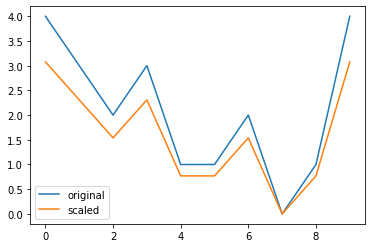

In [12]:
import matplotlib.pyplot as plt

# Plotting original data (list)
plt.plot(goals_for, label='original')

# Plotting normalized data
plt.plot(scaled_data, label='scaled')

# Putting the legend
plt.legend()

plt.show()

Notice the scaled values have lower variations in them.

## Normalization of small numbers
In earlier examples, we have normalization of whole numbers. Next we will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. 

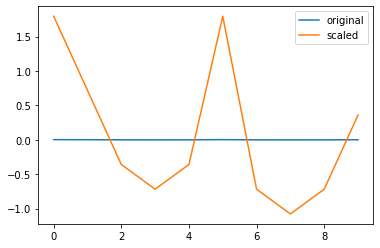

In [13]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

Notice how the changes in the original data are negligible as compared to the scaled data

## FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that we are about to work on contains data on the 1000 top individual players in the game. We will explore various features of the data as we move ahead in the course. In this exercise, we will work with two columns, `eur_wage`, the wage of a player in Euros and `eur_value`, their current transfer market value.

In [14]:
fifa = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv')

print(fifa.shape)
fifa.head()

(1000, 185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


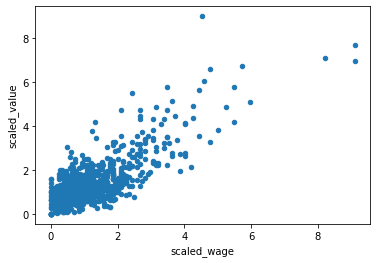

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [15]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

As we can see the scaled values have a standard deviation of 1.

---
---

# Part-2: Hierarchical Clustering
SLIDES

# Part-3: K-Means Clustering
SLIDES

# Part-4: Clustering in Real World
[SLIDES]